# Deploy

**Note the max blob size is INT_MAX ~ 2GB**


In [1]:
import sys
import numpy as np
import os
import cv2
import glob

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# sys.path.insert(0, '/home/nathan/caffe-segnet-crf/python')
sys.path.insert(0, '/Users/nathaning/software/caffe-segnet-crf/python')
import caffe
caffe.set_mode_cpu()

In [3]:
# netdef = '/home/nathan/caffe-segnet-crf/notebooks/deploy-SegNet-CRFRNN.prototxt'
# weight = '/home/nathan/mzmo/analysis/nuclear_seg/weights/finetune_crfrnn_iter_15775.caffemodel'
netdef = '/Users/nathaning/software/caffe-segnet-crf/notebooks_osx/models/deploy-segnet-crfrnn-small.prototxt'
weight = '/Users/nathaning/databases/pca/crfrnn_iter_15000.caffemodel'
net = caffe.Net(netdef, weight, caffe.TEST)

(1, 3, 1024, 1024)


[]

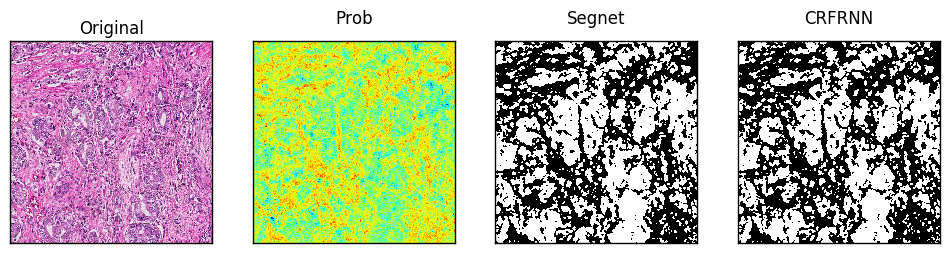

In [7]:
imglist = glob.glob('/Users/nathaning/databases/pca/original_feature/*.jpg')

# imgpath = '/home/nathan/mzmo/data/nuclei/nuclei_seg_0.1/_feature/SP 04-1514 2 L3_001(5+4)_13_1.tif'
imgpath = np.random.choice(imglist)
img_ = cv2.imread(imgpath)
img_ = img_[:,:,::-1]
img = cv2.resize(img_, dsize=(1024, 1024))
img = img.transpose((2,0,1))
img = np.expand_dims(img, 0)
print img.shape

# net.blobs['data'].data[...] = img

_ = net.forward(data=img, end='crfrnn')

fig, ax = plt.subplots(1,4, figsize=(12,5))
ax[0].imshow(img_); ax[0].set_title('Original'); ax[0].set_yticks([]); ax[0].set_xticks([])
ax[1].matshow(np.squeeze(net.blobs['crfrnn'].data[0,1,:,:]))
ax[1].set_title('Prob'); ax[1].set_yticks([]); ax[1].set_xticks([])
ax[2].matshow(np.argmax(np.squeeze(net.blobs['conv_classifier'].data[0,:,:,:]), axis=0), cmap='Greys')
ax[2].set_title('Segnet'); ax[2].set_yticks([]); ax[2].set_xticks([])
ax[3].matshow(np.argmax(np.squeeze(net.blobs['crfrnn'].data[0,:,:,:]), axis=0), cmap='Greys')
ax[3].set_title('CRFRNN'); ax[3].set_yticks([]); ax[3].set_xticks([])

(1, 3, 128, 128)
(1, 1, 128, 128)
(1, 2, 128, 128)


[]

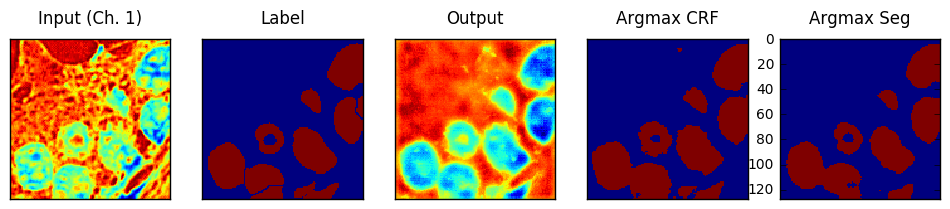

In [27]:
fig, ax = plt.subplots(1,5, figsize=(12,3))

net.forward()
d = net.blobs['data'].data
l = net.blobs['label'].data
s = net.blobs['conv_classifier'].data
o = net.blobs['crfrnn'].data
print d.shape
print l.shape

print o.shape
index = np.random.randint(d.shape[0])
ax[0].matshow(np.squeeze(d[index,0,:,:])); ax[0].set_title('Input (Ch. 1)')
ax[0].set_xticks([]); ax[0].set_yticks([])
ax[1].matshow(np.squeeze(l[index,0,:,:])); ax[1].set_title('Label')
ax[1].set_xticks([]); ax[1].set_yticks([])
ax[2].matshow(np.squeeze(o[index,0,:,:])); ax[2].set_title('Output')
ax[2].set_xticks([]); ax[2].set_yticks([])
ax[3].matshow(np.argmax(np.squeeze(o[index,:,:,:]), axis=0)); ax[3].set_title('Argmax CRF')
ax[3].set_xticks([]); ax[3].set_yticks([])
ax[4].matshow(np.argmax(np.squeeze(s[index,:,:,:]), axis=0)); ax[4].set_title('Argmax Seg')
ax[4].set_xticks([]); ax[3].set_yticks([])